# Linear Regression for sin(X) estimation<br>
#### Lakshya Garg<br> 211000027

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from datetime import datetime
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import math

### Loaded Libraries

In [2]:
X=np.arange(0,2*math.pi,0.1,dtype=float)
Y=np.sin(X)
Y

array([ 0.        ,  0.09983342,  0.19866933,  0.29552021,  0.38941834,
        0.47942554,  0.56464247,  0.64421769,  0.71735609,  0.78332691,
        0.84147098,  0.89120736,  0.93203909,  0.96355819,  0.98544973,
        0.99749499,  0.9995736 ,  0.99166481,  0.97384763,  0.94630009,
        0.90929743,  0.86320937,  0.8084964 ,  0.74570521,  0.67546318,
        0.59847214,  0.51550137,  0.42737988,  0.33498815,  0.23924933,
        0.14112001,  0.04158066, -0.05837414, -0.15774569, -0.2555411 ,
       -0.35078323, -0.44252044, -0.52983614, -0.61185789, -0.68776616,
       -0.7568025 , -0.81827711, -0.87157577, -0.91616594, -0.95160207,
       -0.97753012, -0.993691  , -0.99992326, -0.99616461, -0.98245261,
       -0.95892427, -0.92581468, -0.88345466, -0.83226744, -0.77276449,
       -0.70554033, -0.63126664, -0.55068554, -0.46460218, -0.37387666,
       -0.2794155 , -0.1821625 , -0.0830894 ])

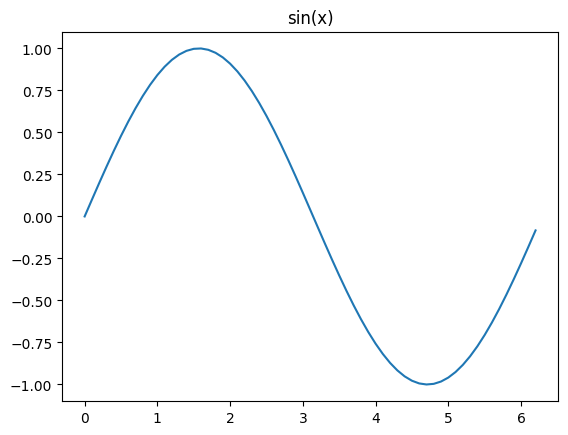

In [3]:
X_train_5=np.zeros((X.shape[0],5))
X_train_10=np.zeros((X.shape[0],10))
y_train=Y
for i in range(5):
    X_train_5[:,i] =X**(i+1)
for i in range(10):
    X_train_10[:,i] =X**(i+1)

X_train_10
X_train_5.shape
plt.plot(X,Y)
plt.title("sin(x)")
plt.show()

In [4]:
class LR:
    
    
    def __init__(self):
        pass    
        
    
    def fit_GD(self,X_train,y_train,epochs,alpha):
        cost_history=[]
        self.weights=np.ones(X_train.shape[1])
        new_weights=np.zeros(X_train.shape[1])
        self.bias=(np.min(y_train)+np.max(y_train))/2
        for k in range(epochs):
            cost_history.append(self.MSE(y_train,self.predict(X_train)))
            new_bias=np.average((np.dot(self.weights.T,X_train.T)+self.bias-y_train))
            new_weights=np.average((np.matmul(self.weights.T**2,X_train.T)+self.bias-y_train))

                
            self.weights-=(new_weights*alpha)
                # updating weights
            self.bias-=(alpha*new_bias)
                # updating bias
        cost_history.append(self.MSE(y_train,self.predict(X_train)))
        return cost_history


    def fit_direct(self,X_train,y_train):
        X_train_orig=X_train
        X_train=np.hstack((X_train,np.ones((X_train.shape[0],1))))
        self.weights=np.linalg.inv(np.dot(X_train.T,X_train)).dot(X_train.T).dot(y_train)
        self.bias=self.weights[-1]
        self.weights=self.weights[0:-1]
        return self.MSE(y_train,self.predict(X_train_orig))


    
    def predict(self,X_test):
        return np.matmul(X_test,self.weights)+self.bias
        
    
    def MSE(self,y_true,y_pred):
        a=y_true-y_pred
        return np.sum(a**2)/a.shape[0]
    # function for Mean Square Error Calculation 
    # It involves no loops it is faster (vectorized)
    


In [5]:
model=LR()
graph_GD=model.fit_GD(X_train_5,y_train,epochs=2000,alpha=0.00001)

In [6]:
y_pred=model.predict(X_train_5)
print(model.weights,"Weight/s by GD")
print(model.bias,"Bias by GD")



[0.04573866 0.04573866 0.04573866 0.04573866 0.04573866] Weight/s by GD
-3.999307779476234 Bias by GD


In [7]:
print(model.MSE(y_train,y_pred))

24675.351474778778


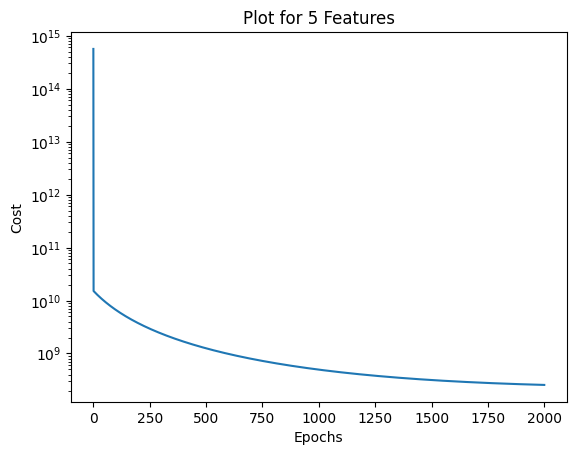

In [22]:
plt.plot(graph_GD)
plt.title("Plot for 5 Features")
plt.xlabel('Epochs')
plt.ylabel("Cost")
plt.yscale("log")
plt.show()

In [9]:
model.fit_direct(X_train_5,y_train)

1.908924262107818e-05

In [28]:
model=LR()
graph_GD=model.fit_GD(X_train_10,y_train,epochs=2000,alpha=0.0000001)

In [29]:
y_pred=model.predict(X_train_10)
print(model.weights,"Weight/s by GD")
print(model.bias,"Bias by GD")


[0.00067342 0.00067342 0.00067342 0.00067342 0.00067342 0.00067342
 0.00067342 0.00067342 0.00067342 0.00067342] Weight/s by GD
-3.6194450803539846 Bias by GD


In [30]:
print(model.MSE(y_train,y_pred))

254938356.82554147


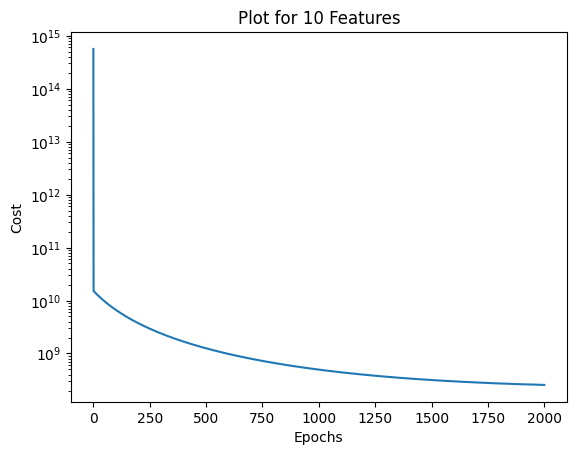

In [31]:
plt.plot(graph_GD)
plt.title("Plot for 10 Features")
plt.xlabel('Epochs')
plt.ylabel("Cost")
plt.yscale("log")
plt.show()

In [32]:
model.fit_direct(X_train_10,y_train)

1.421222949213181e-07

Regularization penalizes when weights increase therefore reducing variance and prevent overfitting